# <span style="color:#BC48CD"> Numerical Simulation Laboratory (NSL) - Esercitazione 3</span>
#### <span style="color:#9C19ED">Author: </span>    Alessia Sambruna <span style="color:#9C19ED">Student number: </span>     942397



# The European option

Le opzioni sono contratti in cui solo un partner assume l'obbligazione mentre l'altro ottiene un diritto.
L'opzione Europea o Vanilla Option è la più semplice versione di contratto in cui:
- il venditore dell'opzione, il "writer" garantisce al compratore, l'holder, il diritto di comprare (= call option) o vendere (=put option) a lui un titolo, in un certo istante $T$ nel futuro ad un determinato prezzo d'esercizio $K$ (=*strike price*)
- Al tempo $T$ Deve vendere o comprare un certo asset per il prezzo al tempo T. 
L'holder sfrutterà il suo diritto di guadagnare un profitto se S(T) > K per una call option. Altrimenti, può comprare l'asset ad un prezzo più basso $S(T) < K$ del mercato:
- *call* è max{0,S(T)-K}
- *put* è dato da max{0,K-S(T)}
Con il pssare del tempo il profitto viene ridotto di un fattore $e^{-rt}$ con tasso $r$



Nell'esercitazione simuliamo l'evoluzione temporale dell'*asset price* in un dato intervallo temporale. Si vuole calcolare il prezzo dell'opzione di *call* e *put*

## Teoria di Black-Scholes theory
Questa teoria fornisce una scoluzione al problema 
L'analisi si basa sulle seguenti assunzioni: 
1. Il mercato è efficiente e non esibisce attrito. 
2. L'evoluzione temporale è stocastica e assume un andamento descrivibile come un moto browniano geometrico con interesse r costante e voiabilità $\sigma$

Si trova che le soluzioni analitiche del problema sono date da 
- il prezzo dell' European Call:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- il prezzo dell' European Put:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

dove $d_2 = d_1 - \sigma\sqrt{T-t}$, e dove
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
è la gaussiana cumulativa $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
e dove
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

In [4]:
#calcolo analitico
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


## Esercizio 
Utilizzando i seguenti parametri: 
- asset price a $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$
calcolare la tempo $t=0$ **via Monte Carlo** il prezzo dell'opzione di call  $C[S(0),0]$e di put $P[S(0),0]$ dell'opzione Europea. 
1. Campionando direttamente il prezzo finale $S(T)$ per una $GBM(r,\sigma^2)$
2. Campionando una discretizzata $GBM(r,\sigma^2)$ percorso di asset price dividendo $[0,T]$ in $10^2$ intervalli di tempo: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

Mostrare quattro grafici della stima dei prezzi di call-option $C[S(0),0]$ e put-option $P[S(0),0]$ con le rispettive uncertainties per un grande numero di prezzi di titoli al tempo $t=T$ in funzione del numero dei blocchi. 



# Soluzione 

Per impostare la media a blocchi e calcolare l'incertezza vengono ripetute le stime un numero $M\ge 10^4$ e dividiamo le iterazioni in un numero di blocchi $N = 100$. 

 ### Algoritmo stima diretta 
- si estrae un valore rnd.Gauss(0, 1)

Dato un prezzo dei titoli $S\sim GBM(\mu,\sigma^2)$, con un valore iniziale $S(0)$, poi 
$$S(t) = S_0 \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
dove $W(t)\sim\mathcal{N}(0,t)$.
- $S = S_0 \cdot \exp[(r - 0.5 \cdot\sigma^2) \cdot T + \sigma \cdot Z_i \cdot \sqrt{T}]$
- $C = \exp(-r \cdot T) \cdot \max(0, Si - K)$
- $P = \exp(-r\cdot T)\cdot \max(0, K-Si)$


### Algoritmo stima progressiva
Si divide l'intervallo di tempo in n sotto intervalli e per ogni sottintervallo calcoliamo
- si genera un numero con distrubuzione normale N(0,1)
- $S_i (T)=S(0)\exp[(r-0.5 \sigma ^2)T+\sigma Z i \sqrt{T}]$
- $C_i =\exp(-rT)\max[0,S_i(T)-K]$
- $P_i =\exp(-rT)\max[0,K- S_i(T) ]$

quindi si determina $C_N =\frac{(\sum_{i=1,N} C_i )}{N}$ e $P_N =\frac{(\sum_{i=1,N} P_i )}{N}$

Inoltre, poichè gli incrementi di $W$ sono indipendenti e normalmente distribuiti, la semplice procedura ricorsiva per stampare valori discretizzati $S\sim GBM(\mu,\sigma^2)$ a $t_1 < t_2 < … < t_n$ è:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$


Per stimare la incertezza utilizziamo l'algoritmo 
$$
\Delta C_N = \bigg[ \frac{1}{N(N-1)}\sum_{i=1}^N (C_i -C_N)^2 \bigg]^{1/2}
$$
e 
$$
\Delta P_N = \bigg[ \frac{1}{N(N-1)}\sum_{i=1}^N (P_i -P_N)^2 \bigg]^{1/2}
$$

## Risultati

Riportiamo quindi gli andamenti della stima progressiva della *Put* e della *Call* nei due casi *diretto* e *discretizzato*  

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [24]:
x_dir, p_dir, err_p_dir , c_dir, err_c_dir = np.loadtxt("Put_Call_direct_prog.dat", usecols=(0,1,2, 3, 4), unpack='true')
x_indir, p_indir, err_p_indir,  c_indir, err_c_indir  = np.loadtxt("Put_Call_indirect_prog.dat", usecols=(0,1,2, 3, 4), unpack='true')

call = black_scholes(S0, K, T, r, sigma)[0]
put = black_scholes(S0, K, T, r, sigma)[1]


In [25]:
colors = {"put":"#D16014", "call": "#3a7ca5"}

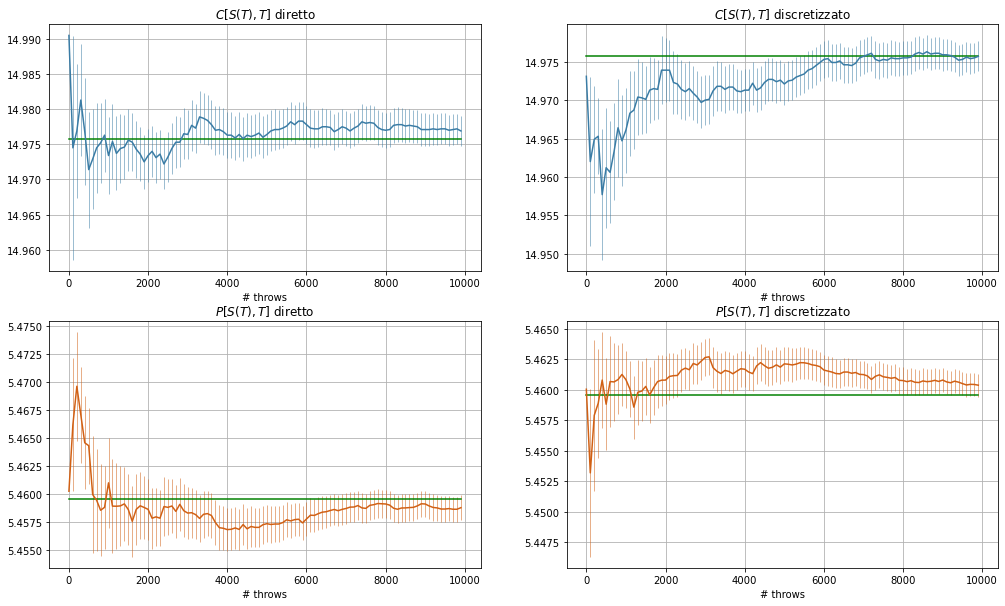

Call option price - diretto = 14.9769 +- 0.00213029
Call option price - discretizzato = 14.9757 +- 0.00195658
Put option price - diretto = 5.45876 +- 0.00110182
Put option price - discretizzato = 5.46037 +- 0.000942196


In [26]:
fig, ((plt_call_direct,plt_call_indirect), (plt_put_direct,plt_put_indirect)) = plt.subplots(2,2, sharex = False)
fig.set_figheight(10)
fig.set_figwidth(17)

plt_call_direct.errorbar(x_dir,c_dir, yerr = err_c_dir, color = colors["call"], elinewidth=0.5); plt_call_direct.title.set_text("$C[S(T),T]$ diretto")
plt_call_direct.set_xlabel("# throws")
plt_call_direct.plot(x_dir, call*np.ones(len(x_dir)), 'g')
plt_call_direct.grid()

plt_call_indirect.errorbar(x_indir,c_indir, yerr = err_c_indir, color = colors["call"], elinewidth=0.5); plt_call_indirect.title.set_text("$C[S(T),T]$ discretizzato")
plt_call_indirect.set_xlabel("# throws")
plt_call_indirect.plot(x_indir, call*np.ones(len(x_indir)), 'g')
plt_call_indirect.grid()

plt_put_direct.errorbar(x_dir,p_dir, yerr = err_p_dir, color = colors["put"], elinewidth=0.5); plt_put_direct.title.set_text("$P[S(T),T]$ diretto")
plt_put_direct.set_xlabel("# throws")
plt_put_direct.plot(x_dir, put*np.ones(len(x_dir)), 'g')
plt_put_direct.grid()

plt_put_indirect.errorbar(x_indir,p_indir, yerr = err_p_indir, color = colors["put"], elinewidth=0.5); plt_put_indirect.title.set_text("$P[S(T),T]$ discretizzato")
plt_put_indirect.set_xlabel("# throws")
plt_put_indirect.plot(x_indir, put*np.ones(len(x_indir)), 'g')
plt_put_indirect.grid()

plt.show()


Confrontiamo i risultati ottenuti con la stima ottenuta dal calcolo analitico. 

In [51]:
from IPython.display import display
import pandas as pd
import numpy as np
# initialize data of lists.
data_dir = {'stima': [c_dir[-1], p_dir[-1]],
        'incertezza': [err_c_dir[-1],err_p_dir[-1]], 
        'stima vera': [call, put], 
        'discrepanza in sigma': [abs(c_dir[-1] - call)/err_c_dir[-1],abs(p_dir[-1] - put)/err_p_dir[-1] ]       
       }
  
# Creates pandas DataFrame.
df_dir = pd.DataFrame(data_dir, index=['Call - direct','Put - direct'])

data_indir = {'stima': [c_indir[-1], p_indir[-1]],
        'incertezza': [err_c_indir[-1],err_p_indir[-1]], 
        'stima vera': [call, put], 
        "discrepanza in sigma": [abs(c_indir[-1] - call)/err_c_indir[-1],abs(p_indir[-1] - put)/err_p_indir[-1] ]       
       }
  #'$ { |x_i - x|}/{\sigma}$'
# Creates pandas DataFrame.
df_indir = pd.DataFrame(data_indir, index=['Call - progressive','Put - progressive'])

display(df_dir)
display(df_indir)

#print("Call option price - diretto = " + str(c_dir[-1]) + " +- " + str(err_c_dir[-1]))
#print("Call option price - discretizzato = " + str(c_indir[-1]) + " +- " + str(err_c_indir[-1]))
#print("Put option price - diretto = " + str(p_dir[-1]) + " +- " + str(err_p_dir[-1]))
#print("Put option price - discretizzato = " + str(p_indir[-1]) + " +- " + str(err_p_indir[-1]))

,stima,incertezza,stima vera,discrepanza in sigma
Call - direct,14.97690,0.002130,14.975791,0.520690
Put - direct,5.45876,0.001102,5.459533,0.701187


,stima,incertezza,stima vera,discrepanza in sigma
Call - progressive,14.97570,0.001957,14.975791,0.046396
Put - progressive,5.46037,0.000942,5.459533,0.888794


### Commento ai risultati 

Osserviamo che i risultati ottenuti ci permettono di ricavare una stima corretta e compatibile con la stima ricavata analiticamente.

Osserviamo che la stima diretta permette di arrivare al risultato più velocemente rispetto alla stima progressiva. Risulta essere un metodo migliore la stima diretta dei risultati. 

In ogni caso ogni metodo giunge al risultato atteso, entro 1 sigma di errore 
